# Feature Engineering

In [4]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sb
import itertools 

In [37]:
notebook_dir = os.path.dirname(os.path.abspath('__file__'))

data_path = os.path.join(notebook_dir, '../data/raw/car_prices.csv')

df = pd.read_csv(data_path)

## Duplication Removal

In [38]:
# Some values are not unique because of capital letters
# We will move all to title format

Object_col = df.select_dtypes(include = "object").columns.to_list()
Numerical_col = df.select_dtypes(exclude = "object").columns.to_list()

Number_of_unique_before = df.nunique()
for column in Object_col:
    df[column] = df[column].str.title()
Number_of_unique_after = df.nunique()
print('Reduce of unique values')
pd.DataFrame(Number_of_unique_before - Number_of_unique_after).T

Reduce of unique values


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,0,30,122,75,41,1,0,0,0,0,0,0,0,0,0,0


### Make

In [39]:
pd.unique(df['make'])

array(['Kia', 'Bmw', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'Mini',
       'Land Rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', nan, 'Dodge', 'Fiat', 'Chrysler',
       'Ferrari', 'Honda', 'Gmc', 'Ram', 'Smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'Hummer', 'Landrover', 'Mercedes',
       'Gmc Truck', 'Saab', 'Suzuki', 'Oldsmobile', 'Isuzu', 'Dodge Tk',
       'Geo', 'Rolls-Royce', 'Mazda Tk', 'Hyundai Tk', 'Mercedes-B', 'Vw',
       'Daewoo', 'Chev Truck', 'Ford Tk', 'Plymouth', 'Ford Truck',
       'Tesla', 'Airstream', 'Dot', 'Aston Martin', 'Fisker',
       'Lamborghini', 'Lotus'], dtype=object)

In [40]:
# As we can see, it can be more generalized
print(f'Make number unique before: {df.make.nunique()}')

df['make'] = df['make'].replace({'Bmw': 'BMW', 'Gmc': 'GMC', 'Ram': 'RAM', 'Gmc Truck': 'GMC', 'Dodge Tk': 'Dodge',
       'Mazda Tk': 'Mazda', 'Hyundai Tk': 'Hyundai' , 'Mercedes-B': 'Mercedes',  'Mercedes-Benz': 'Mercedes' , 'Vw': 'VW',
       'Chev Truck': 'Chevrolet', 'Ford Tk': 'Ford' , 'Ford Truck' :'Ford'})
pd.unique(df['make'])

print(f'Make number unique after: {df.make.nunique()}')
pd.unique(df['make'])

Make number unique before: 66
Make number unique after: 57


array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes', 'Mitsubishi', 'Mazda', 'Mini', 'Land Rover',
       'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota', 'Subaru', 'Scion',
       'Porsche', nan, 'Dodge', 'Fiat', 'Chrysler', 'Ferrari', 'Honda',
       'GMC', 'RAM', 'Smart', 'Bentley', 'Pontiac', 'Saturn', 'Maserati',
       'Mercury', 'Hummer', 'Landrover', 'Saab', 'Suzuki', 'Oldsmobile',
       'Isuzu', 'Geo', 'Rolls-Royce', 'VW', 'Daewoo', 'Plymouth', 'Tesla',
       'Airstream', 'Dot', 'Aston Martin', 'Fisker', 'Lamborghini',
       'Lotus'], dtype=object)

Text(0.5, 0, 'number of cars')

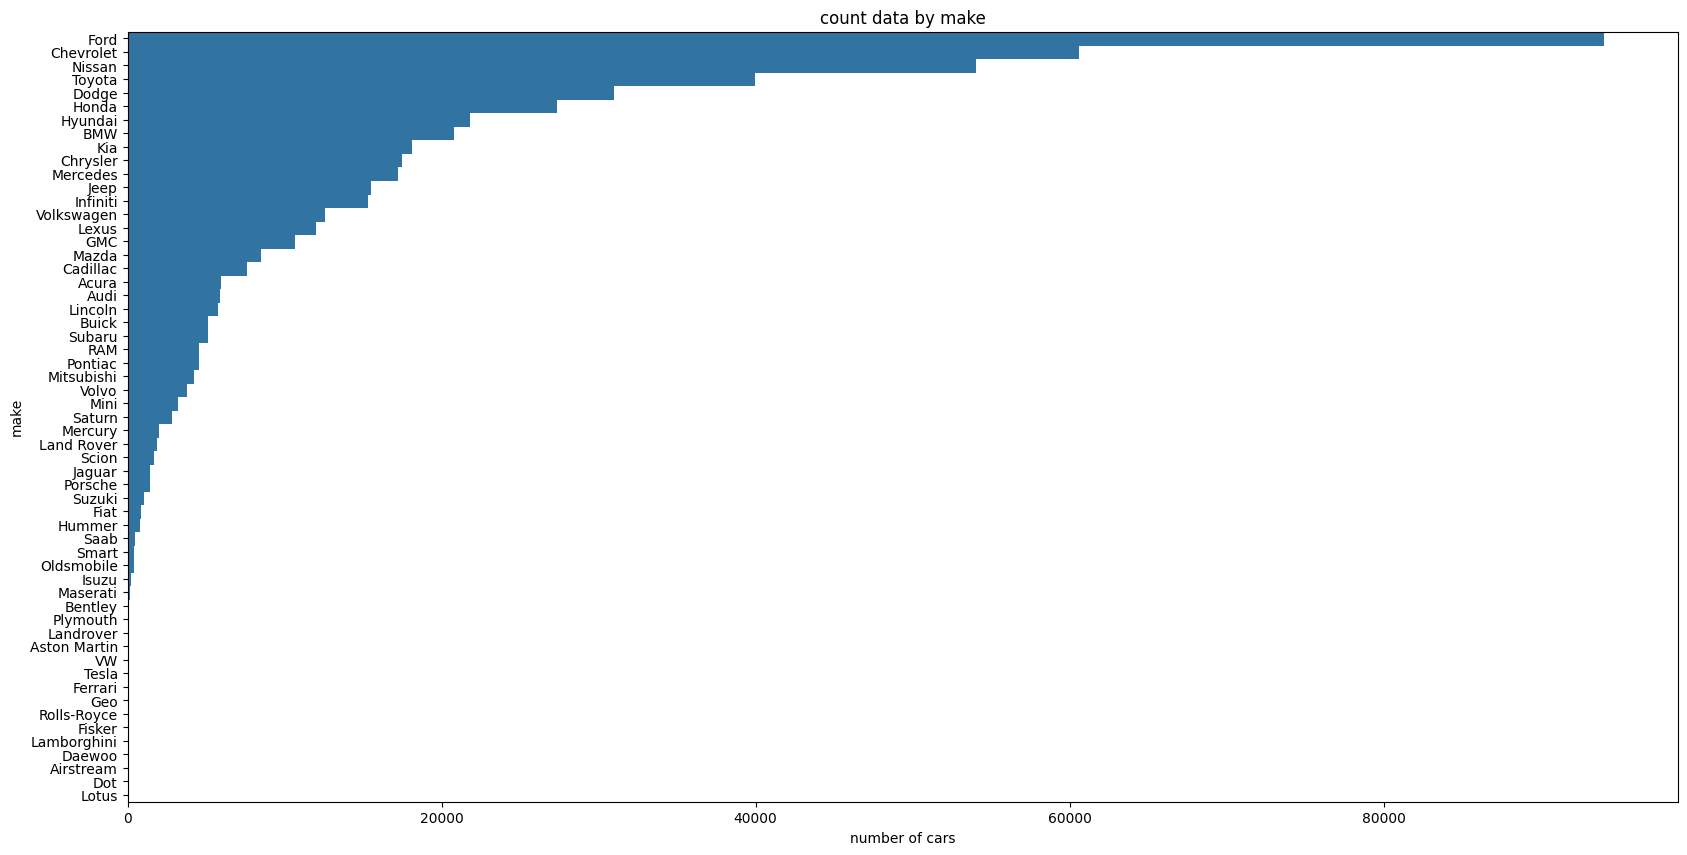

In [41]:
# Check sales by make
make = df['make'].value_counts().index
plt.figure(figsize = (20,10))
plt.title('count data by make', loc = 'center')
sb.countplot(data = df, y = 'make', order = make, width = 1.1)
plt.xlabel('number of cars', loc = 'center')

In [42]:
# We will move Plymouth and below to "Other" category since there are few observations
print(df[df['make'] == 'Bentley'].shape[0])
print(df[df['make'] == 'Plymouth'].shape[0])

116
27


In [43]:
# We create a function to change to Other category
def group_rare_categories(df, column_name, min_count):
    value_counts = df[column_name].value_counts()
    rare_categories = value_counts[value_counts < min_count].index
    df[column_name] = df[column_name].apply(lambda x: 'other' if x in rare_categories else x)
    return df

In [44]:
# Anything with less than 28 observations will be moved to Other
print(f"groups that have less than 28 observations before: {df['make'].value_counts()[df['make'].value_counts()<28]}")

df = group_rare_categories(df, 'make', 28)

print(f"groups that have less than 10 observations after: {df['make'].value_counts()[df['make'].value_counts()<28]}")

groups that have less than 28 observations before: make
Plymouth        27
Landrover       27
Aston Martin    25
VW              24
Tesla           23
Ferrari         19
Geo             19
Rolls-Royce     17
Fisker           9
Lamborghini      4
Daewoo           3
Airstream        1
Dot              1
Lotus            1
Name: count, dtype: int64
groups that have less than 10 observations after: Series([], Name: count, dtype: int64)


### Trim

In [47]:
df['trim'].nunique()

1888

In [51]:
# Too many trim values, lots of them with <100 observations
# Anything with less than 100 observations will be moved to Other
print(f"groups that have less than 100 observations before: {df['trim'].value_counts()[df['trim'].value_counts()<101]}")

df = group_rare_categories(df, 'trim', 101)

print(f"groups that have less than 100 observations after: {df['trim'].value_counts()[df['trim'].value_counts()<101]}")

groups that have less than 100 observations before: trim
Fe                   100
435I                 100
645Ci                100
Pzev                 100
Zx4 Ses               99
                    ... 
E400 Sport Hybrid      1
Gs Plus                1
Lt Eco                 1
740Ld Xdrive           1
Sport Limited          1
Name: count, Length: 1502, dtype: int64
groups that have less than 100 observations after: Series([], Name: count, dtype: int64)


### Car Age
With SaleDate we can get Car Age (which is more important for a vehicle sale predictor

In [54]:
# We check how the data is stored
saledate = df['saledate'].str.split(expand = True)
saledate.head(1)

,0,1,2,3,4,5,6
0,Tue,Dec,16,2014,12:30:00,Gmt-0800,(Pst)


In [55]:
# Car sales range
print(f'month data: {pd.unique(saledate.iloc[:,1])}')
print(f'year data: {pd.unique(saledate.iloc[:,3])}')

month data: ['Dec' 'Jan' 'Jul' 'Feb' 'Jun' 'May' 'Mar' 'Apr' nan None]
year data: ['2014' '2015' nan None]


In [56]:
# We add a new column salesyear to calculate the age of the vehicle in the future
df = pd.merge(left = df, right = saledate.iloc[:, 3], left_index = True, right_index = True)
df.rename(columns = {3: 'salesyear'}, inplace = True)

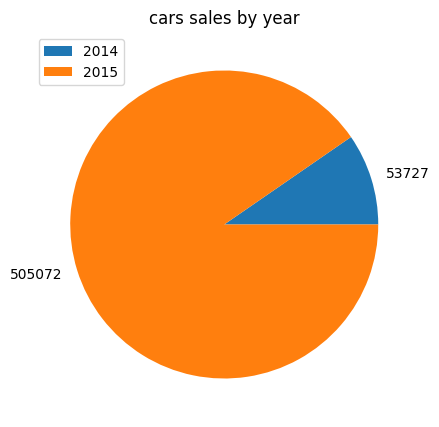

In [57]:
# Number of sales by make
df_sale = df.groupby('salesyear').agg({'salesyear' : 'count'})
plt.figure(figsize = (5,5))
plt.title('cars sales by year', loc = 'center')
plt.pie(df_sale['salesyear'], labels = df_sale['salesyear'] )
plt.legend(labels = df_sale.index, fontsize = 10, loc='upper left')

In [59]:
# Fill nan with 2015
print(f'num nan sales year before: {df.salesyear.isna().sum()}')
df['salesyear'] = df['salesyear'].fillna('2015')
print(f'num nan sales year after: {df.salesyear.isna().sum()}')

num nan sales year before: 38
num nan sales year after: 0


In [61]:
# car age calculation
df['salesyear'] = df['salesyear'].astype(np.int64)
df['car_age'] = df['salesyear'] - df['year']
pd.unique(df['car_age'])

array([-1,  1,  0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 19, 18, 17, 20, 27, 21, 22, 25, 26, 23, 24, 28, 29, 31, 30, 33,
       32])

In [62]:
# Some of the sales are larger than the year of the car, for these lines we will assume that the age of the car is equal to the year of sale
def age(x):
    if x == -1:
       return  0
    else:
       return x
        
df['car_age'] = df['car_age'].apply(age)
pd.unique(df['car_age'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       19, 18, 17, 20, 27, 21, 22, 25, 26, 23, 24, 28, 29, 31, 30, 33, 32])

Text(0.5, 0, 'car_age')

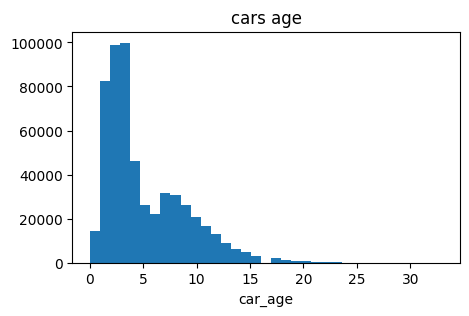

In [63]:
plt.figure(figsize = (5,3))
plt.title('cars age', loc = 'center')
plt.hist(df['car_age'], bins = 35, align = 'mid')
plt.xlabel('car_age', loc = 'center')

### State

In [65]:
df['state'].unique()

array(['Ca', 'Tx', 'Pa', 'Mn', 'Az', 'Wi', 'Tn', 'Md', 'Fl', 'Ne', 'Nj',
       'Nv', 'Oh', 'Mi', 'Ga', 'Va', 'Sc', 'Nc', 'In', 'Il', 'Co', 'Ut',
       'Mo', 'Ny', 'Ma', 'Pr', 'Or', 'La', 'Wa', 'Hi', 'Qc', 'Ab', 'On',
       'Ok', 'Ms', 'Nm', 'Al', '3Vwd17Aj4Fm201708', 'Ns',
       '3Vwd17Aj2Fm258506', '3Vwd17Aj3Fm276741', '3Vwd17Aj2Fm285365',
       '3Vwd17Aj0Fm227318', '3Vwd17Aj6Fm218641', '3Vwd17Aj7Fm223475',
       '3Vwd17Aj5Fm297123', '3Vwd17Aj5Fm219943', '3Vwd17Aj9Fm219766',
       '3Vwd17Aj3Fm259017', '3Vwd17Aj5Fm206111', '3Vwd17Aj5Fm273601',
       '3Vwd17Aj5Fm221322', '3Vwd17Aj5Fm268964', '3Vwd17Aj6Fm231972',
       '3Vwd17Aj7Fm222388', '3Vwd17Aj7Fm218440', '3Vwd17Ajxfm315938',
       '3Vwd17Aj7Fm229552', '3Vwd17Aj8Fm298895', '3Vwd17Aj4Fm236636',
       '3Vwd17Aj5Fm225953', '3Vwd17Aj7Fm326640', '3Vwd17Aj8Fm239622',
       '3Vwd17Aj2Fm261566'], dtype=object)

In [66]:
# Replacing unknown values with NAN values
df['state'] = df['state'].apply(lambda x: np.nan if x[0] == '3' else x)
df['state'].unique()

array(['Ca', 'Tx', 'Pa', 'Mn', 'Az', 'Wi', 'Tn', 'Md', 'Fl', 'Ne', 'Nj',
       'Nv', 'Oh', 'Mi', 'Ga', 'Va', 'Sc', 'Nc', 'In', 'Il', 'Co', 'Ut',
       'Mo', 'Ny', 'Ma', 'Pr', 'Or', 'La', 'Wa', 'Hi', 'Qc', 'Ab', 'On',
       'Ok', 'Ms', 'Nm', 'Al', nan, 'Ns'], dtype=object)

In [68]:
# Transfer state names to a full name
df['state'].replace({'Ca': 'California', 'Tx': 'Texas', 'Pa': 'Pennsylvania', 'Mn': 'Minnesota',
    'Az': 'Arizona', 'Wi': 'Wisconsin', 'Tn': 'Tennessee', 'Md': 'Maryland', 'Fl': 'Florida', 'Ne': 'Nebraska',
    'Nj': 'New Jersey', 'Nv': 'Nevada', 'Oh': 'Ohio', 'Mi': 'Michigan', 'Ga': 'Georgia', 'Va': 'Virginia',
    'Sc': 'South Carolina', 'Nc': 'North Carolina', 'In': 'Indiana', 'Il': 'Illinois', 'Co': 'Colorado',
    'Ut': 'Utah', 'Mo': 'Missouri', 'Ny': 'New York', 'Ma': 'Massachusetts', 'Pr': 'Puerto Rico', 'Or': 'Oregon',
    'La': 'Louisiana', 'Wa': 'Washington', 'Hi': 'Hawaii', 'Qc': 'Quebec',  'Ab': 'Alberta', 'On': 'Ontario', 
    'Ok': 'Oklahoma', 'Ms': 'Mississippi', 'Nm': 'New Mexico', 'Al': 'Alabama', 'Ns': 'Nova Scotia'}, inplace = True)

df['state'].unique()

C:\Users\joand\AppData\Local\Temp\ipykernel_3008\2694051010.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['state'].replace({'Ca': 'California', 'Tx': 'Texas', 'Pa': 'Pennsylvania', 'Mn': 'Minnesota',


array(['California', 'Texas', 'Pennsylvania', 'Minnesota', 'Arizona',
       'Wisconsin', 'Tennessee', 'Maryland', 'Florida', 'Nebraska',
       'New Jersey', 'Nevada', 'Ohio', 'Michigan', 'Georgia', 'Virginia',
       'South Carolina', 'North Carolina', 'Indiana', 'Illinois',
       'Colorado', 'Utah', 'Missouri', 'New York', 'Massachusetts',
       'Puerto Rico', 'Oregon', 'Louisiana', 'Washington', 'Hawaii',
       'Quebec', 'Alberta', 'Ontario', 'Oklahoma', 'Mississippi',
       'New Mexico', 'Alabama', nan, 'Nova Scotia'], dtype=object)

Text(0.5, 0, 'number of cars')

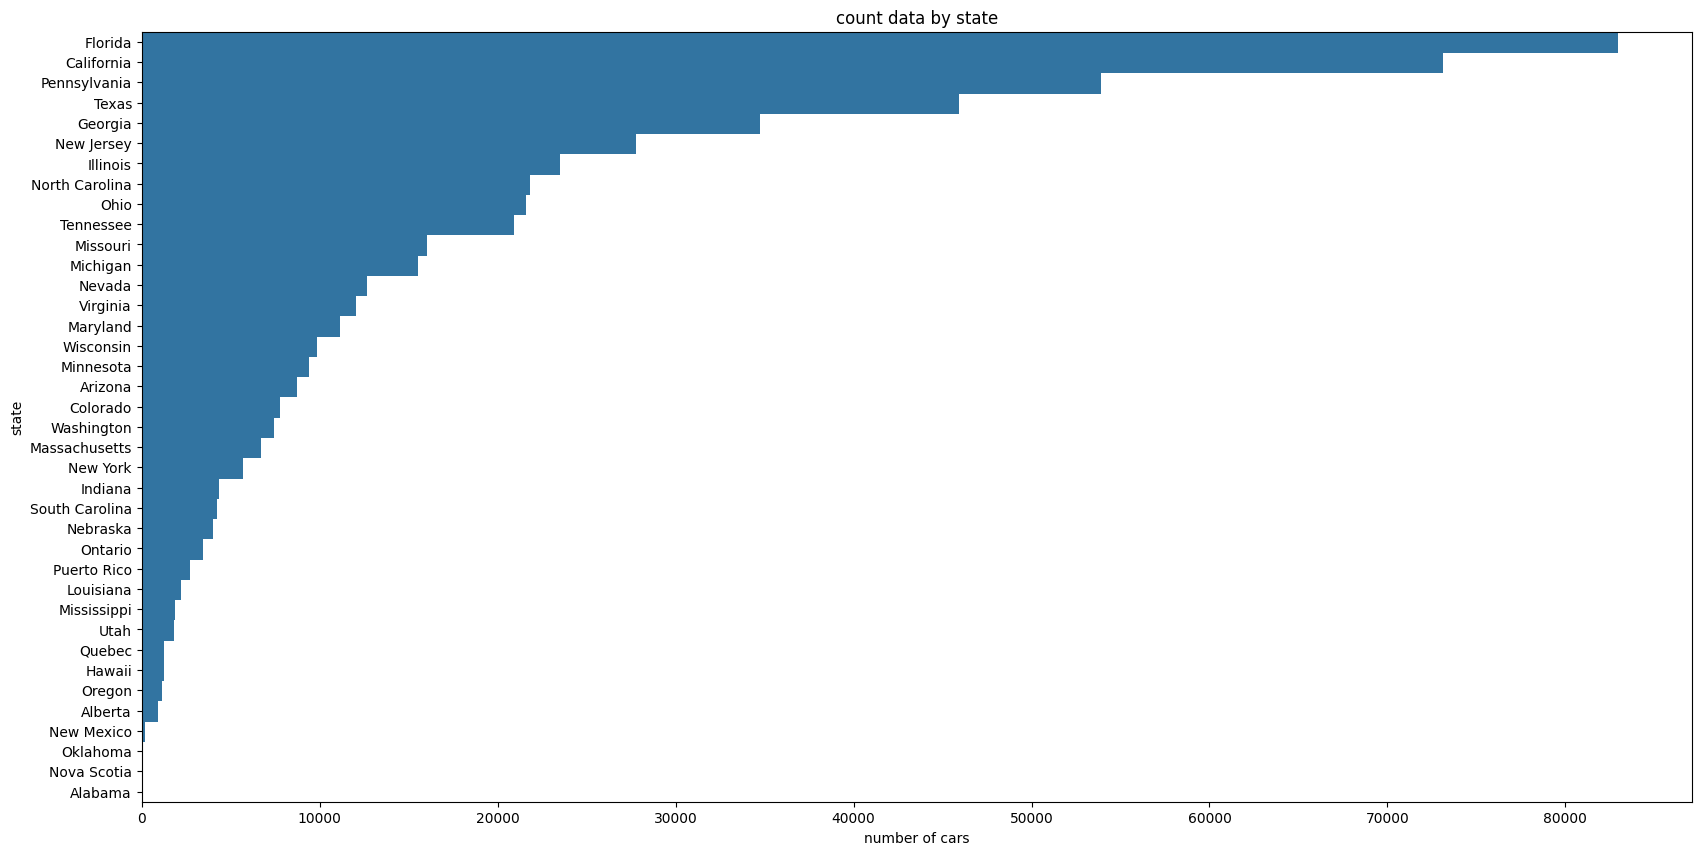

In [69]:
# distribution of vehicles by company
state = df['state'].value_counts().index
plt.figure(figsize = (20,10))
plt.title('count data by state', loc = 'center')
sb.countplot(data = df, y = 'state', order = state, width = 1.1)
plt.xlabel('number of cars', loc = 'center')

In [71]:
# Move groups that have less than 200 observations to "other"
print(f"groups that have less than 200 observations before: {df['state'].value_counts()[df['state'].value_counts()<201]}")

df = group_rare_categories(df, 'state', 201)

print(f"groups that have less than 200 observations after: {df['state'].value_counts()[df['state'].value_counts()<201]}")

groups that have less than 200 observations before: state
New Mexico     171
Oklahoma        72
Nova Scotia     61
Alabama         26
Name: count, dtype: int64
groups that have less than 200 observations after: Series([], Name: count, dtype: int64)


### Transmission

In [72]:
df['transmission'].unique()

array(['Automatic', nan, 'Manual', 'Sedan'], dtype=object)

In [73]:
# Some columns should be body instead of transmission
df['body'].unique()

array(['Suv', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'Crewmax Cab', 'Access Cab',
       'King Cab', 'Supercrew', 'Cts Coupe', 'Extended Cab',
       'E-Series Van', 'Supercab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'Cts-V Coupe', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'Cts Wagon', 'G37 Coupe', 'Mega Cab',
       'Cab Plus 4', 'Q60 Coupe', 'Cab Plus', 'Beetle Convertible',
       'Tsx Sport Wagon', 'Promaster Cargo Van',
       'Granturismo Convertible', 'Cts-V Wagon', 'Ram Van', 'Transit Van',
       'Navitgation', 'Regular-Cab'], dtype=object)

In [79]:
# Here we can see the errors
print(f"Transmission column: {df[df['transmission'] == 'Sedan']['body'].unique()}")
print(f"Body column: {df[df['body'] == 'Navitgation']['transmission'].unique()}")

Transmission column: ['Navitgation']
Body column: ['Sedan']


In [80]:
# Replace content from transmission to body column and delete these records from transmission
for i, row in df.iterrows():
    if row['transmission'] == 'Sedan':
        df.loc[i, 'body'] = 'Sedan'
        df.loc[i, 'transmission'] = np.nan
print(f'transmission unique: {df.transmission.unique()}')

transmission unique: ['Automatic' nan 'Manual']


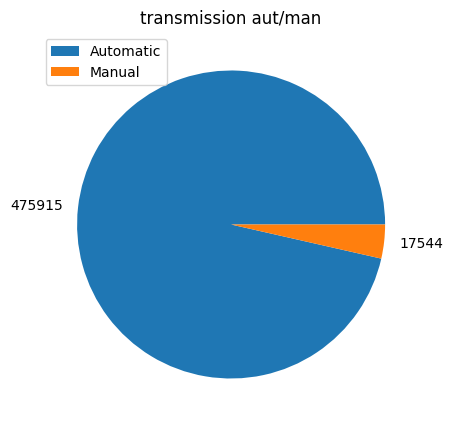

In [81]:
cars_transmission = df.groupby('transmission').agg({'transmission' : 'count'})
plt.figure(figsize = (7,5))
plt.title('transmission aut/man', loc = 'center')
plt.pie(cars_transmission['transmission'], labels = cars_transmission['transmission'] )
plt.legend(labels = cars_transmission.index, fontsize = 10, loc='upper left')

### Body

In [83]:
df['body'].unique()

array(['Suv', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'Crewmax Cab', 'Access Cab',
       'King Cab', 'Supercrew', 'Cts Coupe', 'Extended Cab',
       'E-Series Van', 'Supercab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'Cts-V Coupe', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'Cts Wagon', 'G37 Coupe', 'Mega Cab',
       'Cab Plus 4', 'Q60 Coupe', 'Cab Plus', 'Beetle Convertible',
       'Tsx Sport Wagon', 'Promaster Cargo Van',
       'Granturismo Convertible', 'Cts-V Wagon', 'Ram Van', 'Transit Van',
       'Regular-Cab'], dtype=object)

In [85]:
# Fix it to have less unique categories
df['body'].replace({'G37 Coupe' : 'Coupe', 'Cts Wagon' : 'Wagon', 'Cts-V Wagon' : 'Wagon',
                    'G37 Convertible' : 'Convertible', 'G Sedan' : 'Sedan', 'G Convertible' : 'Convertible', 'G Coupe': 'Coupe',
                    'Granturismo Convertible' : 'Convertible', 'Ram Van' : 'Van', 'Transit Van': 'Van', 'Q60 Convertible' : 'Convertible',
                    'Q60 Coupe': 'Coupe', 'Tsx Sport Wagon' : 'Sport Wagon', 'Beetle Convertible': 'Convertible',
                    'E-Series Van' : 'Van', 'Elantra Coupe' : 'Coupe', 'Genesis Coupe': 'Coupe', 'Koup' : 'Coupe',
                    'Tsx Sport Wagon' : 'Wagon', 'Cts Coupe' : 'Coupe' , 'Cts-V Coupe' : 'Coupe', 'Promaster Cargo Van' : 'Van' ,
                    'Supercrew' : 'Cab', 'Double Cab' : 'Cab' , 'Access Cab' : 'Cab',
                    'King Cab' : 'Cab', 'Extended Cab' : 'Cab', 'Supercab' : 'Cab', 'Regular Cab' : 'Cab', 'Quad Cab' : 'Cab',
                    'Club Cab' : 'Cab', 'Xtracab' : 'Cab', 'Mega Cab' : 'Cab', 'Cab Plus 4' : 'Cab', 'Cab Plus' : 'Cab',
                     'Crewmax Cab': 'Cab', 'Crew Cab': 'Cab' , 'Regular-Cab': 'Cab' }, inplace = True)
df['body'].unique()

array(['Suv', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Cab', 'Minivan', nan, 'Van'], dtype=object)

<Figure size 400x500 with 0 Axes>

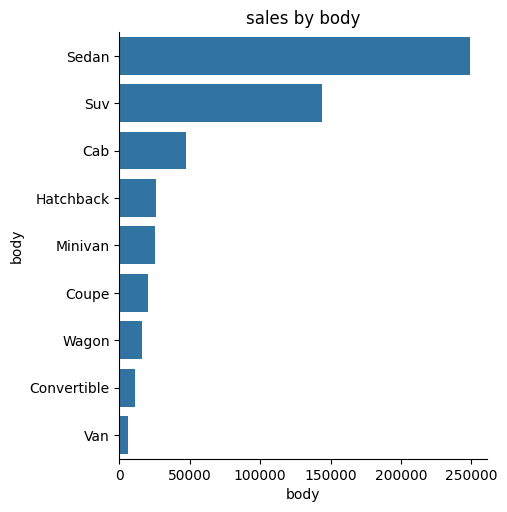

In [87]:
# distribution of sales by body
body_order = df['body'].value_counts().reset_index()['body']
plt.figure(figsize = (4,5))
sb.catplot(y='body', data=df, kind='count', order = body_order )
plt.title('sales by body', loc = 'center')
plt.xlabel('body', loc = 'center')
plt.show()

### Color

In [89]:
df['color'].unique()

array(['White', 'Gray', 'Black', 'Red', 'Silver', 'Blue', 'Brown',
       'Beige', 'Purple', 'Burgundy', '—', 'Gold', 'Yellow', 'Green',
       'Charcoal', nan, 'Orange', 'Off-White', 'Turquoise', 'Pink',
       'Lime', '4802', '9410', '1167', '2172', '14872', '12655', '15719',
       '6388', '16633', '11034', '2711', '6864', '339', '18384', '9887',
       '9837', '20379', '20627', '721', '6158', '2817', '5705', '18561',
       '2846', '9562', '5001'], dtype=object)

In [90]:
# Transferring irrelevant data to nan
def delete_non_state(x):
    del_list = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '—']
    for i in str(x):
        if str(i) in del_list:
            return np.nan
        else:
            return x
df['color'] = df['color'].apply(lambda x: delete_non_state(x))
df['color'].unique()

array(['White', 'Gray', 'Black', 'Red', 'Silver', 'Blue', 'Brown',
       'Beige', 'Purple', 'Burgundy', nan, 'Gold', 'Yellow', 'Green',
       'Charcoal', 'Orange', 'Off-White', 'Turquoise', 'Pink', 'Lime'],
      dtype=object)

Text(0.5, 28.999999999999986, 'sales')

<Figure size 500x400 with 0 Axes>

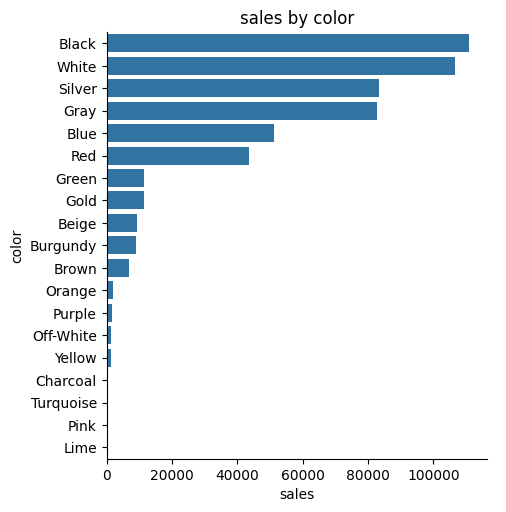

In [94]:
# distribution of sales by color
color_order = df['color'].value_counts().reset_index()['color']
plt.figure(figsize = (5,4))
sb.catplot(y='color', data=df, kind='count', order = color_order)
plt.title('sales by color', loc = 'center')
plt.xlabel('sales', loc = 'center')

In [96]:
# Move groups that have less than 250 observations to "other"
print(f"groups that have less than 250 observations before: {df['color'].value_counts()[df['color'].value_counts()<251]}")

df = group_rare_categories(df, 'color', 251)

print(f"groups that have less than 250 observations after: {df['color'].value_counts()[df['color'].value_counts()<251]}")

groups that have less than 250 observations before: color
Turquoise    236
Pink          42
Lime          15
Name: count, dtype: int64
groups that have less than 250 observations after: Series([], Name: count, dtype: int64)


### Interior

In [97]:
df['interior'].unique()

array(['Black', 'Beige', 'Tan', '—', 'Gray', 'Brown', 'Burgundy', 'White',
       nan, 'Silver', 'Off-White', 'Blue', 'Red', 'Yellow', 'Green',
       'Purple', 'Orange', 'Gold'], dtype=object)

In [98]:
# Replacing values "-" to nan
df['interior'].replace({'—': np.nan}, inplace = True)

C:\Users\joand\AppData\Local\Temp\ipykernel_3008\4044277188.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['interior'].replace({'—': np.nan}, inplace = True)


In [99]:
# Move groups that have less than 200 observations to "other"
print(f"groups that have less than 200 observations before: {df['interior'].value_counts()[df['interior'].value_counts()<201]}")

df = group_rare_categories(df, 'interior', 201)

print(f"groups that have less than 200 observations after: {df['interior'].value_counts()[df['interior'].value_counts()<201]}")

groups that have less than 200 observations before: interior
Burgundy    191
Orange      145
Yellow       20
Name: count, dtype: int64
groups that have less than 200 observations after: Series([], Name: count, dtype: int64)


### Condition

In [100]:
np.sort(df['condition'].unique())

array([ 1.,  2.,  3.,  4.,  5., 11., 12., 13., 14., 15., 16., 17., 18.,
       19., 21., 22., 23., 24., 25., 26., 27., 28., 29., 31., 32., 33.,
       34., 35., 36., 37., 38., 39., 41., 42., 43., 44., 45., 46., 47.,
       48., 49., nan])

Text(0.5, 0, 'condition')

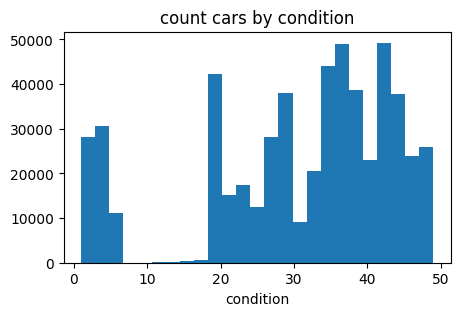

In [101]:
# data distribution by condition
plt.figure(figsize = (5,3))
plt.title('count cars by condition', loc = 'center')
plt.hist(df['condition'], bins = 25, align = 'mid')
plt.xlabel('condition', loc = 'center')

In [102]:
# It looks like Condition was rated 1-5 or 10-50. We will transfer it to 10-50 scale.
# Data transfer to 1-50 scale
df['condition'] = df['condition'].apply(lambda x: x*10 if x < 10 else x)
np.sort(df['condition'].unique())

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.,
       36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48.,
       49., 50., nan])

### Odometer

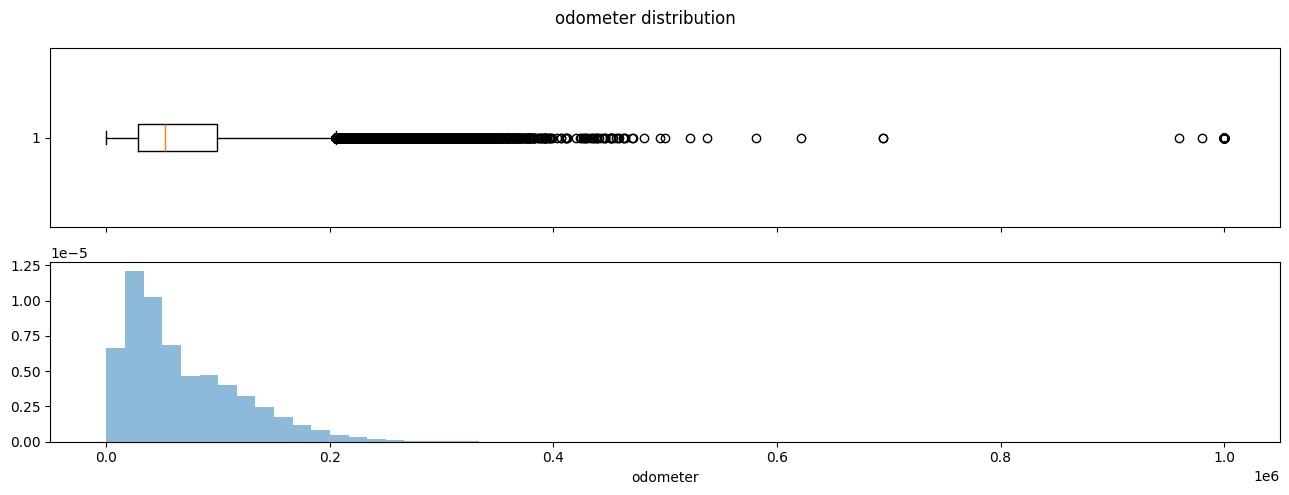

In [103]:
# Checking the distribution of values and outliers
fig, place = plt.subplots(nrows=2,ncols=1,figsize=(13,5),sharex=True)
plt.suptitle('odometer distribution')
plt.xlabel('odometer', loc = 'center')

place[0].boxplot(df[df['odometer'].notna()]['odometer'], vert = False)
place[1].hist(df[df['odometer'].notna()]['odometer'],bins=60,alpha=0.5,density=True)

plt.tight_layout()
plt.show()

In [112]:
# check abnormal values, how many rows there is a mileage equal to 1 and the age of the vehicle is over a year
df['odometer'] = pd.to_numeric(df['odometer'])
print(f"mileage equal to 1: {df[(df['odometer']<2)]['odometer'].count()}")
print(f"mileage equal to 1 and the age of the vehicle is over a year: {df[(df['odometer']<2) & (df['car_age']>0)]['odometer'].count()}")
print(f"mileage equal to 1 and the age of the vehicle is less than a year: {df[(df['odometer']<2) & (df['car_age']==0)]['odometer'].count()}")
# check rows with mileage over 900000 
print(f"mileage over 900000: {df[df['odometer']>900001]['odometer'].count()}")
# transfer rows to nan
df['odometer'] = df.apply(lambda x: np.nan if (x['odometer'] < 2 and x['car_age'] > 0) or (x['odometer'] > 990000) else x['odometer'], axis=1)

mileage equal to 1: 46
mileage equal to 1 and the age of the vehicle is over a year: 27
mileage equal to 1 and the age of the vehicle is less than a year: 19
mileage over 900000: 2


In [116]:
print(f"mileage equal to 1: {df[(df['odometer']<2)]['odometer'].count()}")
print(f"mileage equal to 1 and the age of the vehicle is over a year: {df[(df['odometer']<2) & (df['car_age']>0)]['odometer'].count()}")
print(f"mileage equal to 1 and the age of the vehicle is less than a year: {df[(df['odometer']<2) & (df['car_age']==0)]['odometer'].count()}")
print(f"mileage over 990000: {df[df['odometer']>990000]['odometer'].count()}")

mileage equal to 1: 19
mileage equal to 1 and the age of the vehicle is over a year: 0
mileage equal to 1 and the age of the vehicle is less than a year: 19
mileage over 990000: 0


### Saleprice

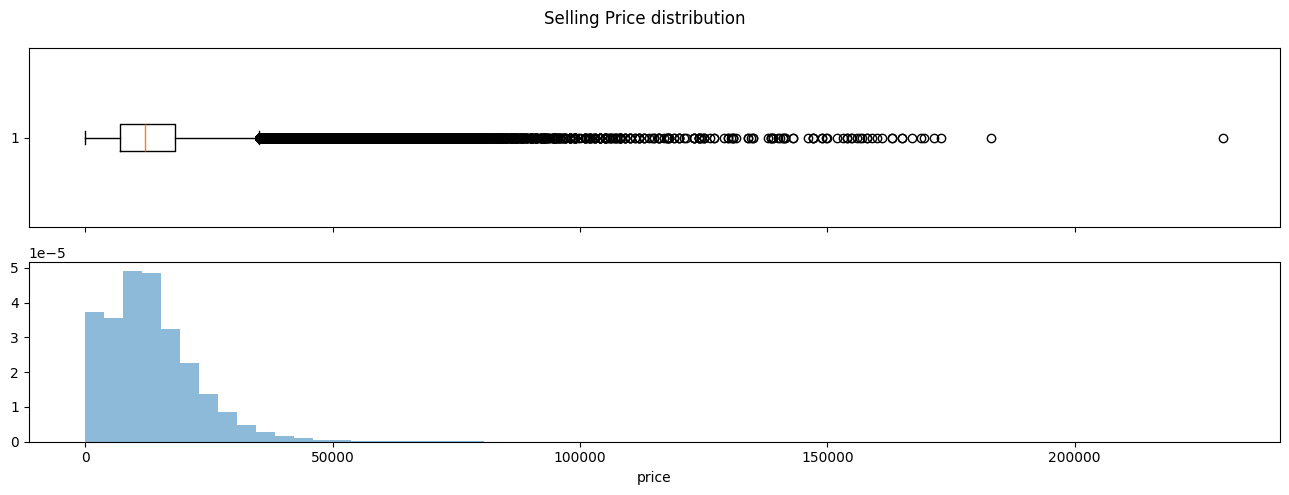

In [118]:
# Checking the distribution of values and outliers
fig, place = plt.subplots(nrows=2,ncols=1,figsize=(13,5),sharex=True)

plt.suptitle('Selling Price distribution')
plt.xlabel('price', loc = 'center')

place[0].boxplot(df[df['sellingprice'].notna()]['sellingprice'],vert=False)
place[1].hist(df[df['sellingprice'].notna()]['sellingprice'],bins=60,alpha=0.5,density=True)

plt.tight_layout()
plt.show()

C:\Users\joand\AppData\Local\Temp\ipykernel_3008\1948193987.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='year', y='sellingprice', data=df, palette='rainbow')


Text(0.5, 0, 'year')

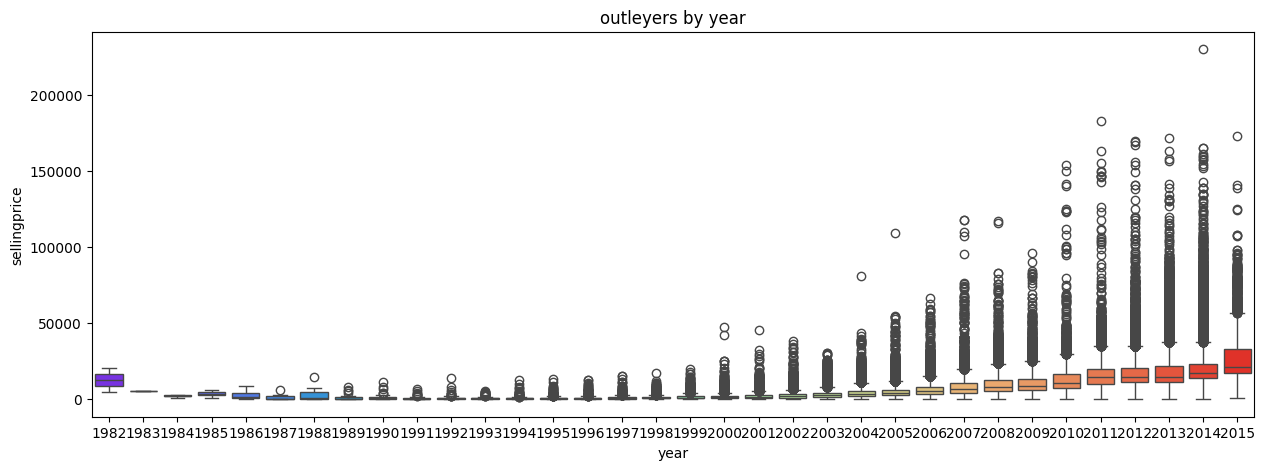

In [119]:
# Checking the distribution of values ​​and outliers by year 
plt.figure(figsize = (15,5))
plt.title('outleyers by year', loc = 'center')
sb.boxplot(x='year', y='sellingprice', data=df, palette='rainbow')
plt.xlabel('year', loc = 'center')

In [120]:
df['price_res']=df['mmr']-df['sellingprice']
df['price_res'].describe().round(2)

count    558799.00
mean        158.02
std        1758.94
min     -207200.00
25%        -650.00
50%          50.00
75%         800.00
max       87750.00
Name: price_res, dtype: float64

In [122]:
# sales price under 150$
print(f"sales price under 150$: {df[df['sellingprice']<150]['sellingprice'].count()}")
# sales price residuals under or upper 25000$
print(f"sales price residuals under or upper 25000$: {df[(df['price_res']>25000) | (df['price_res']<-25000)]['price_res'].count()}")
# delete rows 
df = df[(df['sellingprice']>150) & (df['price_res']<25000) & (df['price_res']>-25000)]

sales price under 150$: 24
sales price residuals under or upper 25000$: 72
